In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import random
import os
import torch
from torch.utils.data import Dataset
from PIL import Image
from PIL import ImageOps
import pandas as pd
from torchvision import transforms
from torch.utils.data import DataLoader

Found 139 .tif files in the directory ../data/training8bit.
L

Metadata for 001.tif:
No metadata available.
L

Metadata for 003.tif:
No metadata available.


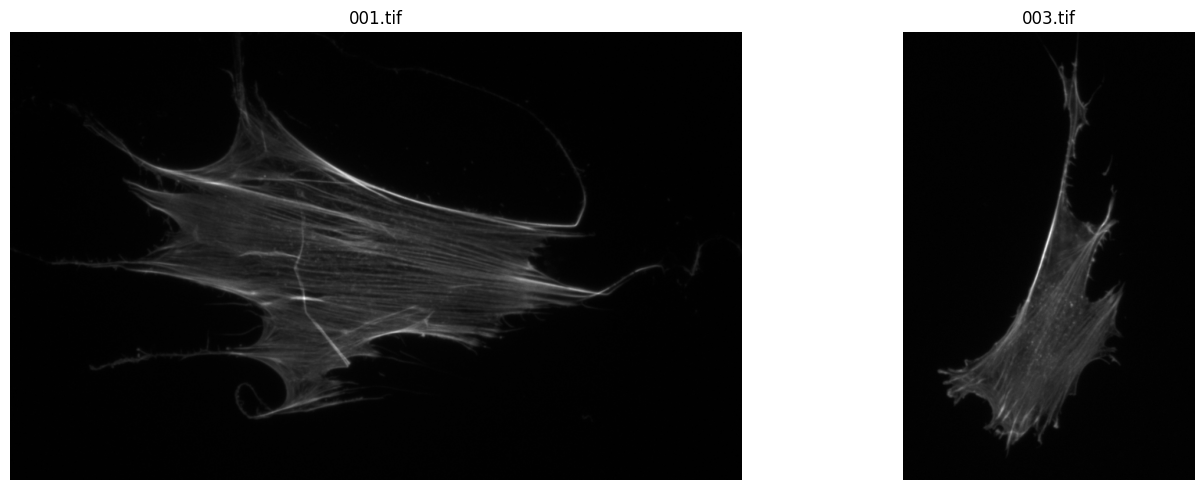

In [37]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Set the path to your training folder
data_dir = "../data/training8bit"

# Check if the directory exists
if not os.path.exists(data_dir):
    raise FileNotFoundError(f"The directory {data_dir} does not exist.")

# Get a list of all .tif files in the training directory
tif_files = [f for f in os.listdir(data_dir) if f.endswith('.tif')]

tif_files.sort()

# Print a message if no .tif files are found
if not tif_files:
    print(f"No .tif files found in the directory {data_dir}.")
else:
    print(f"Found {len(tif_files)} .tif files in the directory {data_dir}.")

# Determine the number of images to display (maximum of 5 for layout clarity)
num_images = 2

# Initialize a figure for displaying images
fig, axes = plt.subplots(1, num_images, figsize=(15, 5)) if num_images > 1 else (plt.subplots(figsize=(5, 5))[1],)

# Process each .tif file (limiting to the first few if many images)
for idx, tif_file in enumerate(tif_files[:num_images]):
    # Open the image
    file_path = os.path.join(data_dir, tif_file)
    image = Image.open(file_path)
    
    # Convert image to RGB if not already in a compatible mode
    print(image.mode)
    if image.mode not in ("RGB", "RGBA"):
        image = image.convert("RGB")
    
    # Print metadata for each file
    print(f"\nMetadata for {tif_file}:")
    if hasattr(image, 'tag_v2'):  # Check if image has 'tag_v2' attribute
        for tag, value in image.tag_v2.items():
            print(f"{tag}: {value}")
    else:
        print("No metadata available.")

    # Plot the image in the subplot
    ax = axes[idx] if num_images > 1 else axes
    ax.imshow(image)
    ax.set_title(tif_file)
    ax.axis('off')  # Turn off axis

# Adjust layout to avoid overlap and show all images
plt.tight_layout()
plt.show()


In [30]:
import os
import numpy as np
from PIL import Image

def get_image_bit_depth(image: Image.Image) -> int:
    """
    Determines the bit depth of a PIL Image.
    
    Args:
        image (PIL.Image.Image): The image to check.
        
    Returns:
        int: Bit depth (e.g., 8, 16)
    """
    mode_to_bpp = {
        "1": 1,
        "L": 8,
        "P": 8,
        "RGB": 8,
        "RGBA": 8,
        "I": 32,
        "I;16": 16,
        "F": 32
    }
    return mode_to_bpp.get(image.mode, 8)  # Default to 8 if unknown

# Define paths
datafolder = "../data/training"
output_folder = "../data/training8bit"

# Check if the input directory exists
if not os.path.exists(datafolder):
    raise FileNotFoundError(f"The input directory {datafolder} does not exist.")

# Create the output directory if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
    print(f"Created directory: {output_folder}")

# Get a list of all .tif files in the training directory
tif_files = [f for f in os.listdir(datafolder) if f.lower().endswith('.tif')]
tif_files.sort()

# Check if there are .tif files
if not tif_files:
    print(f"No .tif files found in the directory {datafolder}.")
else:
    print(f"Found {len(tif_files)} .tif files in the directory {datafolder}.")

# Process each .tif file
for idx, tif_file in enumerate(tif_files):
    # Open the image
    file_path = os.path.join(datafolder, tif_file)
    image = Image.open(file_path)
    
    # Determine bit-depth
    bit_depth = get_image_bit_depth(image)
    print(f"Processing {tif_file}: Bit-depth = {bit_depth}")
    
    # Convert image to grayscale if not already
    if image.mode not in ["L", "I;16"]:
        image = image.convert("L")  # Convert to 8-bit grayscale
    
    # Convert to NumPy array
    image_np = np.array(image)
    
    # Handle different bit-depths
    if bit_depth > 8:
        # Scale down to 8-bit
        min_val = image_np.min()
        max_val = image_np.max()
        if min_val == max_val:
            print(f"Image {tif_file} has uniform pixel values (min = max = {min_val}). Setting to zero.")
            image_np_8bit = np.zeros_like(image_np, dtype=np.uint8)
        else:
            # Scale pixel values to 0-255
            image_np_scaled = 255 * (image_np - min_val) / (max_val - min_val)
            image_np_8bit = image_np_scaled.astype(np.uint8)
    else:
        # If already 8-bit, no scaling needed
        image_np_8bit = image_np.astype(np.uint8)
    
    # Convert back to PIL Image
    image_8bit_pil = Image.fromarray(image_np_8bit, mode='L')
    
    # Save the 8-bit image
    new_file_path = os.path.join(output_folder, tif_file)
    image_8bit_pil.save(new_file_path)
    
    print(f"Saved 8-bit version of {tif_file} to {new_file_path}.")

# Completion message
print("All images have been processed and saved in 8-bit format.")


Found 139 .tif files in the directory ../data/training.
Processing 001.tif: Bit-depth = 8
Saved 8-bit version of 001.tif to ../data/training8bit/001.tif.
Processing 003.tif: Bit-depth = 8
Saved 8-bit version of 003.tif to ../data/training8bit/003.tif.
Processing 005.tif: Bit-depth = 8
Saved 8-bit version of 005.tif to ../data/training8bit/005.tif.
Processing 007.tif: Bit-depth = 8
Saved 8-bit version of 007.tif to ../data/training8bit/007.tif.
Processing 009.tif: Bit-depth = 8
Saved 8-bit version of 009.tif to ../data/training8bit/009.tif.
Processing 011.tif: Bit-depth = 8
Saved 8-bit version of 011.tif to ../data/training8bit/011.tif.
Processing 013.tif: Bit-depth = 8
Saved 8-bit version of 013.tif to ../data/training8bit/013.tif.
Processing 015.tif: Bit-depth = 8
Saved 8-bit version of 015.tif to ../data/training8bit/015.tif.
Processing 017.tif: Bit-depth = 8
Saved 8-bit version of 017.tif to ../data/training8bit/017.tif.
Processing 019.tif: Bit-depth = 8
Saved 8-bit version of 019.t

Found 139 .tif files in the directory ../data/training8bit.
Image 001.tif: Min = 0, Max = 255
Image 003.tif: Min = 0, Max = 255


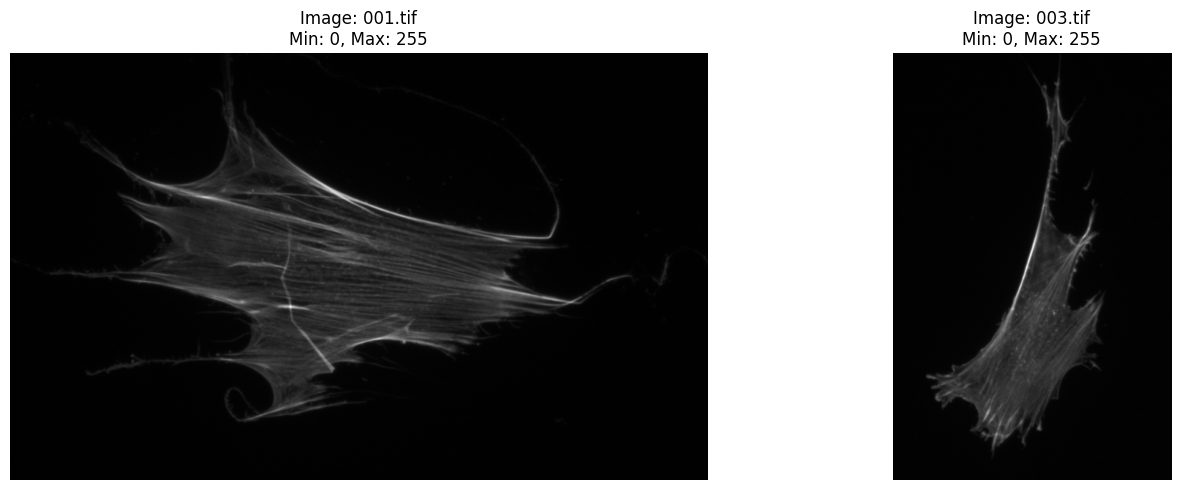

In [36]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Define paths
data_dir = "../data/training8bit"

# Check if the directory exists
if not os.path.exists(data_dir):
    raise FileNotFoundError(f"The directory {data_dir} does not exist.")

# Get a list of all .tif files in the training8bit directory
tif_files = [f for f in os.listdir(data_dir) if f.lower().endswith('.tif')]
tif_files.sort()

# Print a message if no .tif files are found
if not tif_files:
    print(f"No .tif files found in the directory {data_dir}.")
else:
    print(f"Found {len(tif_files)} .tif files in the directory {data_dir}.")

# Determine the number of images to display (set to 2 or fewer if not enough)
num_images = min(2, len(tif_files))

if num_images == 0:
    print("No images to display.")
else:
    # Initialize a figure for displaying images
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5)) if num_images > 1 else (plt.subplots(figsize=(5, 5))[1],)
    
    # If only one image, axes is not iterable
    if num_images == 1:
        axes = [axes]
    
    # Process each .tif file (limiting to the first few if many images)
    for idx, tif_file in enumerate(tif_files[:num_images]):
        # Open the image
        file_path = os.path.join(data_dir, tif_file)
        image = Image.open(file_path)
        
        # Convert the image to a NumPy array
        image_np = np.array(image)
        
        # Print the min and max values of the image to verify correct scaling
        min_val = image_np.min()
        max_val = image_np.max()
        print(f"Image {tif_file}: Min = {min_val}, Max = {max_val}")
        
        # Display the image
        axes[idx].imshow(image_np, cmap='gray', vmin=0, vmax=255)
        axes[idx].set_title(f"Image: {tif_file}\nMin: {min_val}, Max: {max_val}")
        axes[idx].axis('off')
    
    # Adjust layout to avoid overlap and show all images
    plt.tight_layout()
    plt.show()


In [33]:
import os
import numpy as np
from PIL import Image

# Define paths
datafolder = "../data/training"

# Check if the input directory exists
if not os.path.exists(datafolder):
    raise FileNotFoundError(f"The input directory {datafolder} does not exist.")

# Get a list of all .tif files in the training directory
tif_files = [f for f in os.listdir(datafolder) if f.lower().endswith('.tif')]
tif_files.sort()

# Check if there are .tif files
if not tif_files:
    print(f"No .tif files found in the directory {datafolder}.")
else:
    print(f"Found {len(tif_files)} .tif files in the directory {datafolder}.")

# Inspect the first 3 images
num_inspect = min(3, len(tif_files))
for idx, tif_file in enumerate(tif_files[:num_inspect]):
    file_path = os.path.join(datafolder, tif_file)
    image = Image.open(file_path)
    image_np = np.array(image)
    min_val = image_np.min()
    max_val = image_np.max()
    print(f"Original Image {tif_file}: Min = {min_val}, Max = {max_val}, Mean = {image_np.mean():.2f}")


Found 139 .tif files in the directory ../data/training.
Original Image 001.tif: Min = 948, Max = 49165, Mean = 3221.09
Original Image 003.tif: Min = 900, Max = 34656, Mean = 2423.59
Original Image 005.tif: Min = 932, Max = 42405, Mean = 2654.35


In [38]:
import os
import cv2
import numpy as np
from PIL import Image

def convert_to_8bit(image_path, output_path):
    """
    Converts a high bit-depth image to 8-bit grayscale.
    
    Args:
        image_path (str): Path to the original image.
        output_path (str): Path to save the converted 8-bit image.
    """
    # Read the image using OpenCV
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    
    if image is None:
        print(f"Failed to read {image_path}. Skipping.")
        return
    
    # Check the bit depth
    if image.dtype == np.uint16:
        bit_depth = 16
    elif image.dtype == np.uint8:
        bit_depth = 8
    else:
        print(f"Unsupported bit depth for {image_path}: {image.dtype}. Skipping.")
        return
    
    print(f"Processing {os.path.basename(image_path)}: Bit-depth = {bit_depth}")
    
    # If the image is multi-channel (e.g., RGB), convert to grayscale
    if len(image.shape) == 3 and image.shape[2] in [3, 4]:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        print("Converted to grayscale.")
    
    # Normalize the image if it's 16-bit
    if bit_depth == 16:
        min_val = np.min(image)
        max_val = np.max(image)
        print(f"Original 16-bit Image Min = {min_val}, Max = {max_val}")
        
        if min_val == max_val:
            print(f"Image has uniform pixel values. Setting to zeros.")
            image_8bit = np.zeros_like(image, dtype=np.uint8)
        else:
            # Scale to 0-255
            image_normalized = (image - min_val) / (max_val - min_val)
            image_8bit = (image_normalized * 255).astype(np.uint8)
            print(f"Scaled Image to 8-bit.")
    elif bit_depth == 8:
        # If already 8-bit, use the image as is
        image_8bit = image.copy()
        min_val = np.min(image_8bit)
        max_val = np.max(image_8bit)
        print(f"Original 8-bit Image Min = {min_val}, Max = {max_val}")
    else:
        print(f"Unsupported bit depth for {image_path}: {image.dtype}. Skipping.")
        return
    
    # Verify scaling
    new_min = np.min(image_8bit)
    new_max = np.max(image_8bit)
    print(f"Converted 8-bit Image Min = {new_min}, Max = {new_max}")
    
    # Save the 8-bit image using PIL to ensure compatibility
    image_pil = Image.fromarray(image_8bit)
    image_pil.save(output_path)
    print(f"Saved 8-bit image to {output_path}.\n")

def main():
    # Define paths
    datafolder = "../data/training"
    output_folder = "../data/training8bit"
    
    # Check if the input directory exists
    if not os.path.exists(datafolder):
        raise FileNotFoundError(f"The input directory {datafolder} does not exist.")
    
    # Create the output directory if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
        print(f"Created directory: {output_folder}\n")
    
    # Get a list of all .tif files in the training directory
    tif_files = [f for f in os.listdir(datafolder) if f.lower().endswith('.tif')]
    tif_files.sort()
    
    # Check if there are .tif files
    if not tif_files:
        print(f"No .tif files found in the directory {datafolder}.")
        return
    else:
        print(f"Found {len(tif_files)} .tif files in the directory {datafolder}.\n")
    
    # Process each .tif file
    for idx, tif_file in enumerate(tif_files):
        input_path = os.path.join(datafolder, tif_file)
        output_path = os.path.join(output_folder, tif_file)
        convert_to_8bit(input_path, output_path)
    
    print("All images have been processed and saved in 8-bit format.")

if __name__ == "__main__":
    main()


Found 139 .tif files in the directory ../data/training.

Processing 001.tif: Bit-depth = 16
Original 16-bit Image Min = 948, Max = 49165
Scaled Image to 8-bit.
Converted 8-bit Image Min = 0, Max = 255
Saved 8-bit image to ../data/training8bit/001.tif.

Processing 003.tif: Bit-depth = 16
Original 16-bit Image Min = 900, Max = 34656
Scaled Image to 8-bit.
Converted 8-bit Image Min = 0, Max = 255
Saved 8-bit image to ../data/training8bit/003.tif.

Processing 005.tif: Bit-depth = 16
Original 16-bit Image Min = 932, Max = 42405
Scaled Image to 8-bit.
Converted 8-bit Image Min = 0, Max = 255
Saved 8-bit image to ../data/training8bit/005.tif.

Processing 007.tif: Bit-depth = 16
Original 16-bit Image Min = 900, Max = 32978
Scaled Image to 8-bit.
Converted 8-bit Image Min = 0, Max = 255
Saved 8-bit image to ../data/training8bit/007.tif.

Processing 009.tif: Bit-depth = 16
Original 16-bit Image Min = 952, Max = 65535
Scaled Image to 8-bit.
Converted 8-bit Image Min = 0, Max = 255
Saved 8-bit ima